<a href="https://colab.research.google.com/github/AidenHadisi/ml-journey/blob/main/p004_california_housing_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [ ]:
from pathlib import Path

import kagglehub
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
# Set global theme and styles for matplotlib and seaborn
sns.set_theme(style="whitegrid", palette="muted")
sns.set_context("notebook", font_scale=1.1)

# Configure matplotlib rcParams for better-looking plots
plt.rc("figure", figsize=(12, 6), titlesize=16)
plt.rc("axes", titlesize=14, labelsize=12, grid=True)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)
plt.rc("legend", fontsize=10)
plt.rc("grid", alpha=0.3)

In [ ]:
path = Path(kagglehub.dataset_download("rajathiagaraj/califronia-housing"))
df = pd.read_csv(path / "housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
# Check which columns contain missing values
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
# Check the skew of the data
# Shows heavy right skews for some columns such as total_rooms
df.skew(numeric_only=True)

longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms           4.147343
total_bedrooms        3.459546
population            4.935858
households            3.410438
median_income         1.646657
median_house_value    0.977763
dtype: float64

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


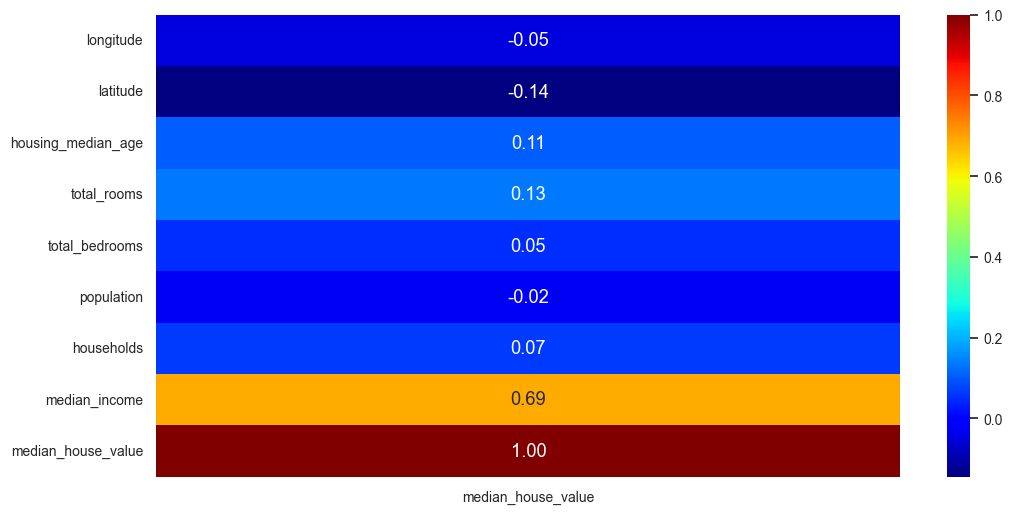

In [ ]:
corr = df.corr(numeric_only=True)["median_house_value"]
sns.heatmap(corr.to_frame(), cmap="jet", annot=True, fmt=".2f")
plt.show()

In [ ]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

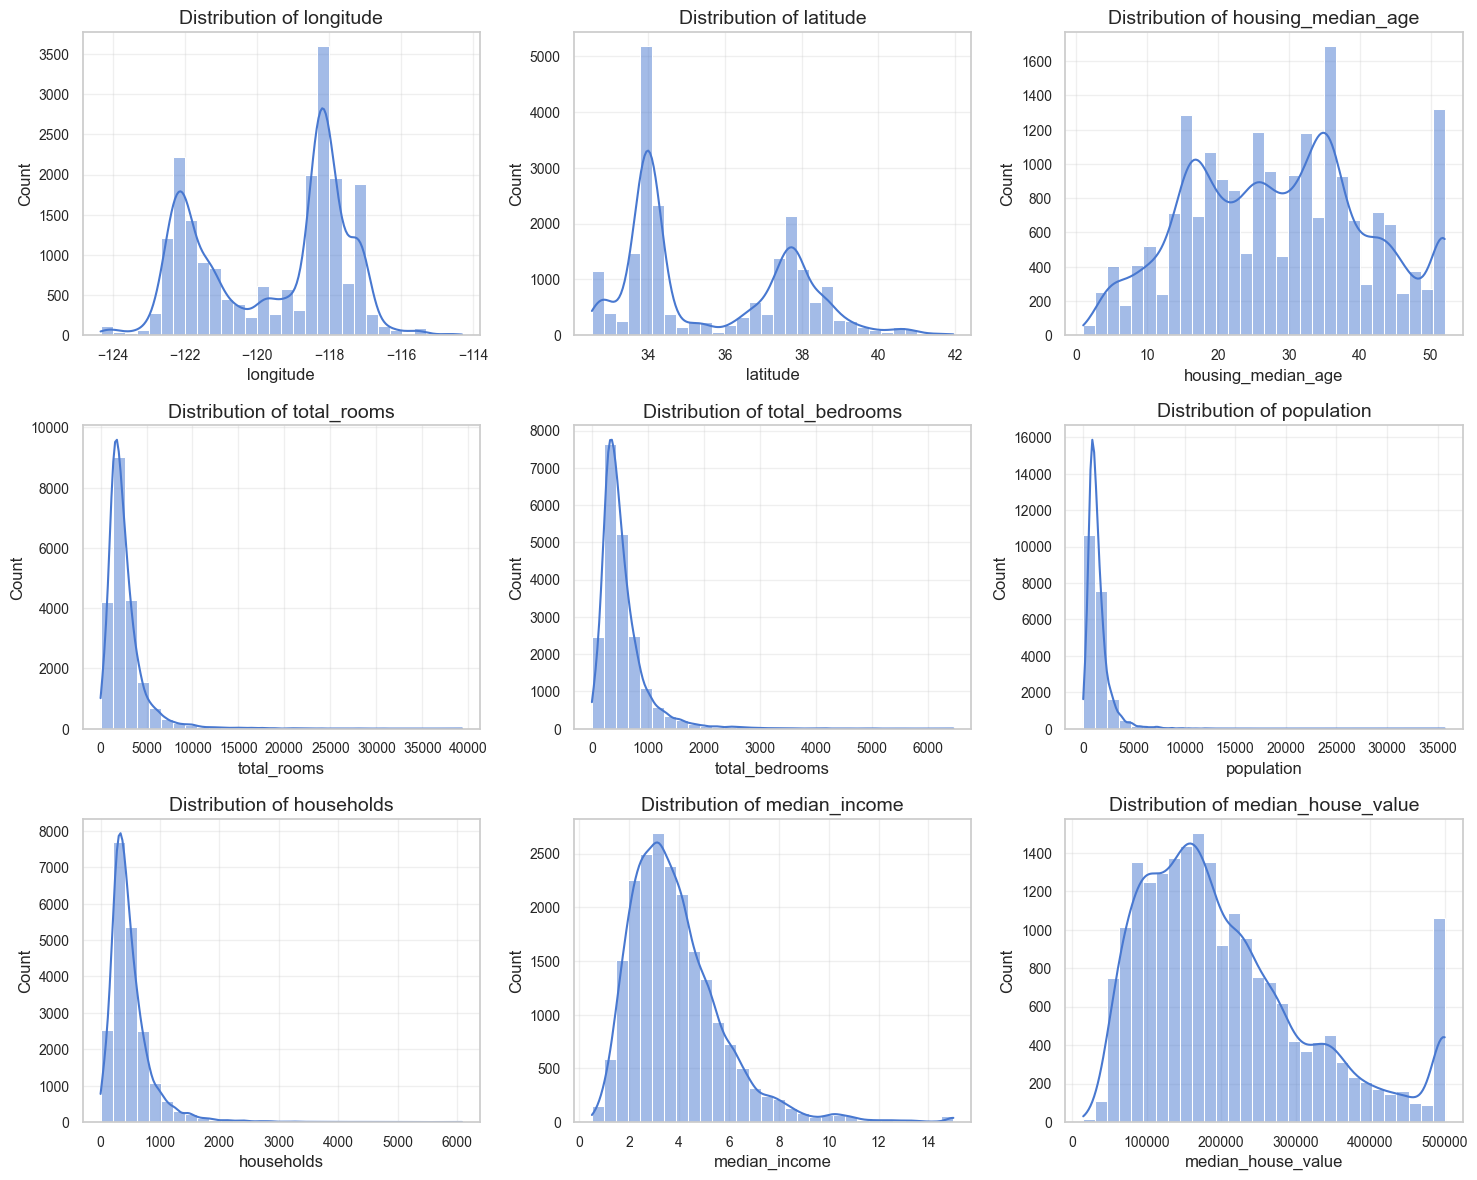

In [ ]:
numeric_cols = df.select_dtypes(include="number").columns

fig, axes = plt.subplots(3, 3, figsize=(15, 12))

for ax, col in zip(axes.flat, numeric_cols):
    sns.histplot(data=df, x=col, kde=True, ax=ax, bins=30)
    ax.set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [ ]:
df["income_cat"] = pd.qcut(
    df["median_income"], q=5, labels=["very low", "low", "medium", "high", "very high"]
)

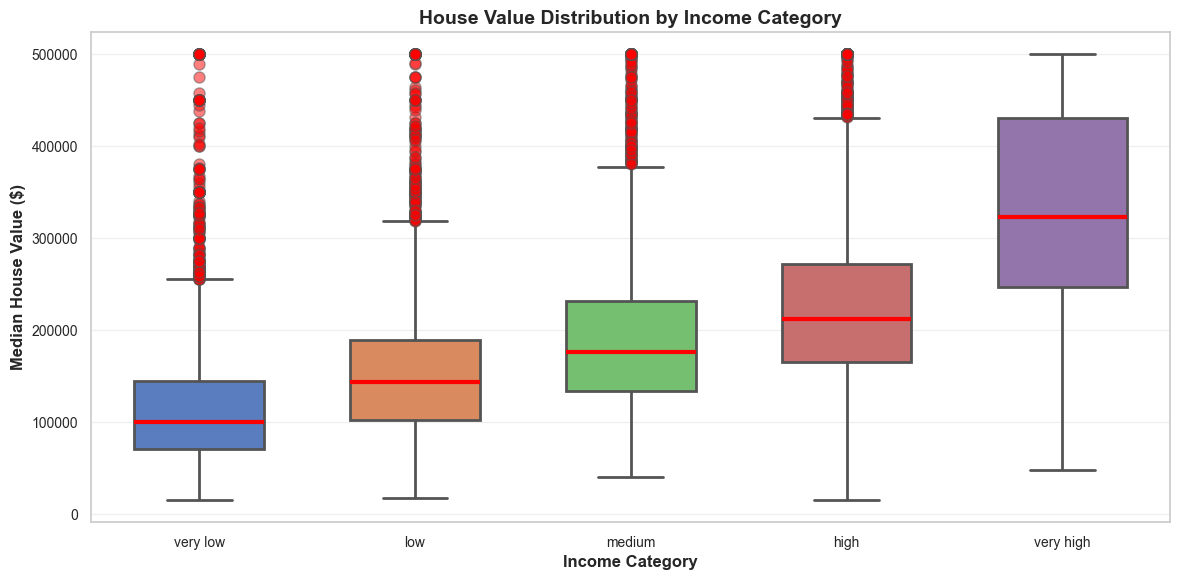

In [ ]:
sns.boxplot(
    data=df,
    x="income_cat",
    y="median_house_value",
    hue="income_cat",
    width=0.6,
    linewidth=2,
    fliersize=6,
    medianprops=dict(color="red", linewidth=3),  # Customize median line
    flierprops=dict(marker="o", markerfacecolor="red", markersize=8, alpha=0.5),
)
plt.xlabel("Income Category", fontsize=12, fontweight="bold")
plt.ylabel("Median House Value ($)", fontsize=12, fontweight="bold")
plt.title("House Value Distribution by Income Category", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

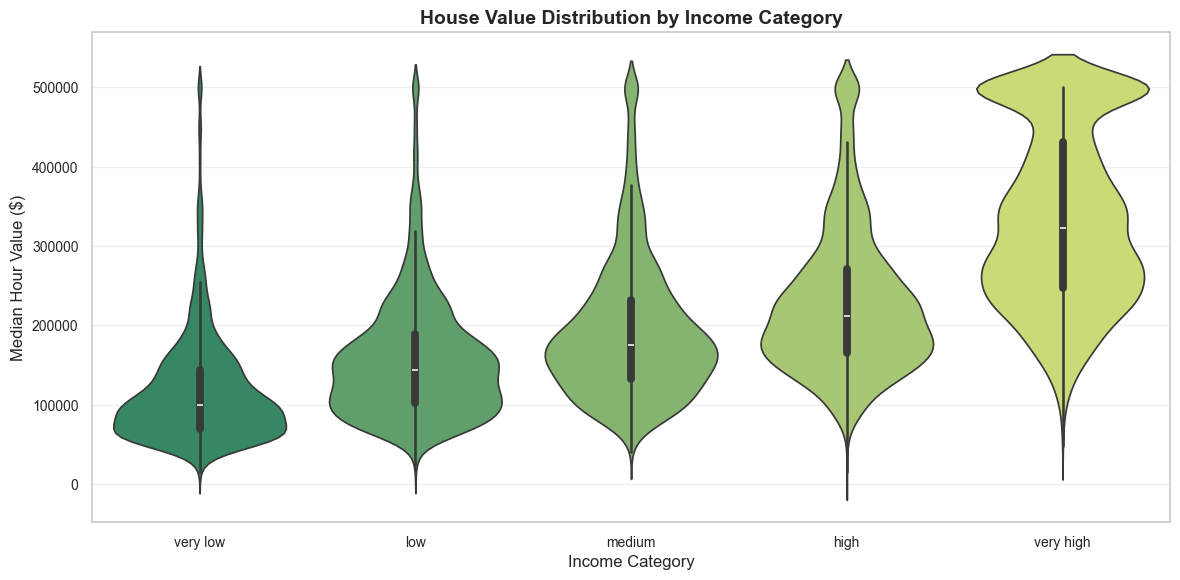

In [ ]:
sns.violinplot(
    data=df, x="income_cat", y="median_house_value", hue="income_cat", palette="summer"
)
plt.xlabel("Income Category")
plt.title("House Value Distribution by Income Category", fontsize=14, fontweight="bold")
plt.ylabel("Median Hour Value ($)")
plt.tight_layout()
plt.show()

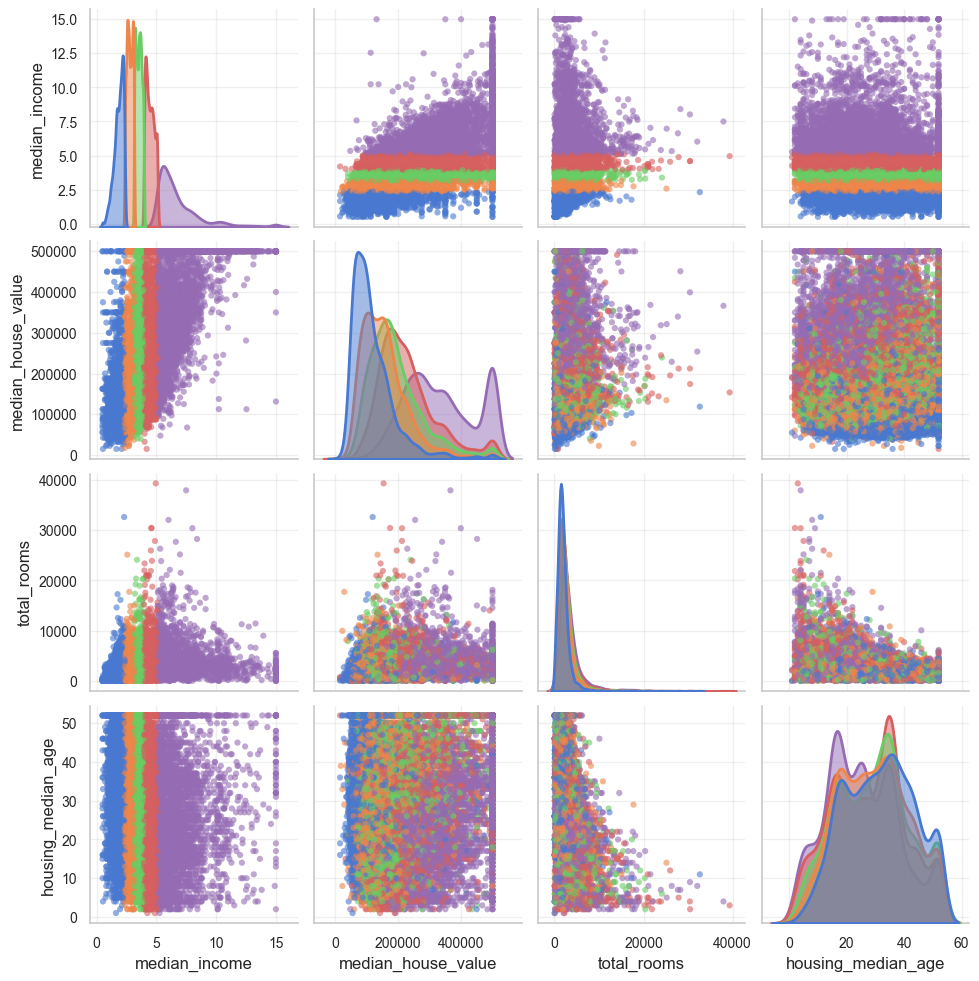

In [ ]:
g = sns.pairplot(
    df[
        [
            "median_income",
            "median_house_value",
            "total_rooms",
            "housing_median_age",
            "income_cat",
        ]
    ],
    diag_kind="kde",
    hue="income_cat",
    plot_kws=dict(alpha=0.6, s=20, edgecolor="none"),
    diag_kws=dict(linewidth=2, alpha=0.5, fill=True),
)
g.legend.remove() if g.legend else None
plt.show()

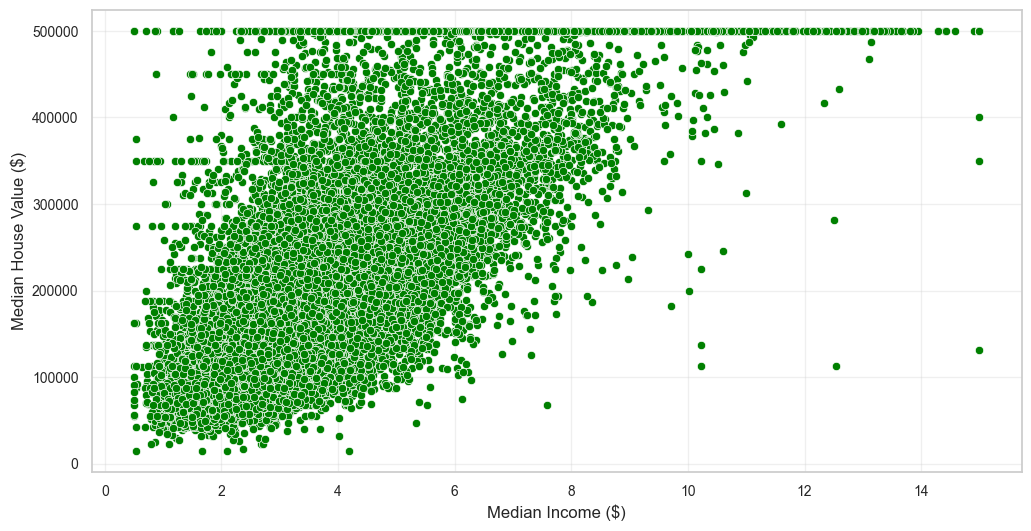

In [ ]:
sns.scatterplot(df, x="median_income", y="median_house_value", marker="o", c="green")
plt.xlabel("Median Income ($)")
plt.ylabel("Median House Value ($)")
plt.show()

In [ ]:
# Let's create some more features
df["rooms_per_house"] = df["total_rooms"] / df["households"]
df["bedrooms_ratio"] = df["total_bedrooms"] / df["total_rooms"]
df["people_per_house"] = df["population"] / df["households"]

In [ ]:
X = df.drop(columns="median_house_value")
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_house,bedrooms_ratio,people_per_house
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,very high,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,very high,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,very high,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,very high,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,medium,6.281853,0.172096,2.181467


In [ ]:
y = df["median_house_value"]
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df["income_cat"]
)

In [ ]:
X_train.drop(columns="income_cat", inplace=True)
X_test.drop(columns="income_cat", inplace=True)

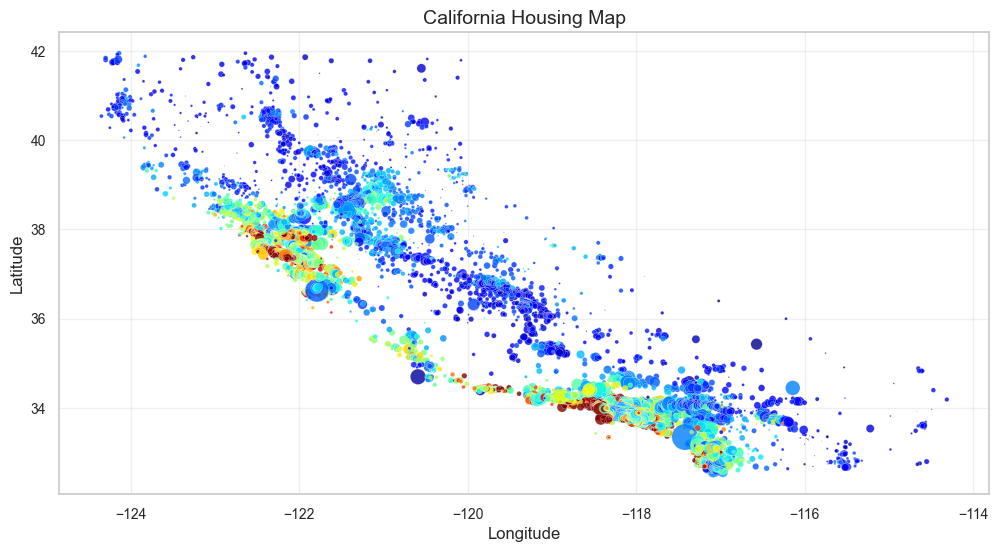

In [ ]:
sns.scatterplot(
    df,
    x="longitude",
    y="latitude",
    s=df["population"] / 100,
    c=df["median_house_value"],
    alpha=0.8,
    cmap="jet",
    legend=True,
)
plt.gca().set(xlabel="Longitude", ylabel="Latitude", title="California Housing Map")
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(X_train)

,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'most_frequent'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. If a feature has nomissing values at fit/train time, the feature won't appear onthe missing indicator even if there are missing values attransform/test time.",False
,"keep_empty_features keep_empty_features: bool, default=FalseIf True, features that consist exclusively of missing values when`fit` is called are returned in results when `transform` is called.The imputed value is always `0` except when `strategy=""constant""`in which case `fill_value` will be used instead... versionadded:: 1.2",False


In [ ]:
imputer.statistics_

array([-118.31, 34.06, 52.0, 1613.0, 280.0, 891.0, 282.0, 3.125,
       '<1H OCEAN', 4.5, 0.25, 3.0], dtype=object)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define the transformer with automatic DataFrame output
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(), ["ocean_proximity"])],
    remainder="passthrough",
).set_output(transform="pandas")

# Fit and transform - automatically returns DataFrames
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
X

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17458,0.0,0.0,0.0,0.0,1.0
7584,1.0,0.0,0.0,0.0,0.0
12464,0.0,1.0,0.0,0.0,0.0
187,0.0,0.0,0.0,1.0,0.0
11031,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
17413,0.0,0.0,0.0,0.0,1.0
16350,0.0,1.0,0.0,0.0,0.0
3013,0.0,1.0,0.0,0.0,0.0
12621,0.0,1.0,0.0,0.0,0.0
